# Set up

In [3]:
import datetime as dt
import numpy as np
import pandas as pd

# We are also going to do some basic viz
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df=pd.read_pickle('../data/interim/data_for_exploration.pkl')

# Explore cleaned data

In [5]:
df.head()

,object_id,funded_at,funding_round_type,raised_amount_usd,participants,id,name,category_code,status,founded_at,closed_at,region,first_funding_at,acquired_object_id,acquired_at,public_at
0,c:1,2005-10-01,series-a,5250000.0,2,c:1,Wetpaint,web,operating,2005-10-17,NaT,Seattle,2005-10-01,NaN,NaT,NaT
1,c:1,2007-01-01,series-b,9500000.0,3,c:1,Wetpaint,web,operating,2005-10-17,NaT,Seattle,2005-10-01,NaN,NaT,NaT
2,c:1,2008-05-19,series-c+,25000000.0,4,c:1,Wetpaint,web,operating,2005-10-17,NaT,Seattle,2005-10-01,NaN,NaT,NaT
3,c:1001,2008-02-26,series-a,5000000.0,3,c:1001,FriendFeed,web,acquired,2007-10-01,NaT,SF Bay,2008-02-26,c:1001,2009-08-10,NaT
5,c:10015,2008-10-10,series-a,2000000.0,2,c:10015,Fitbit,health,operating,2007-10-01,NaT,SF Bay,2008-10-10,NaN,NaT,NaT


In [158]:
# Find count of companes with funding info for model training
len(df.id.unique())

20321

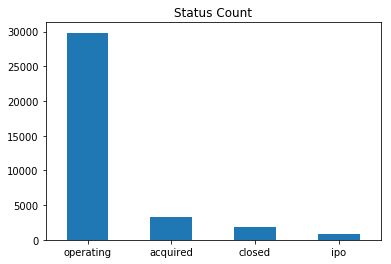

In [150]:
counts=df.status.value_counts()
counts.plot(kind='bar', title='Status Count', rot=0);

In [151]:
recent_df=df[df['founded_at']>'2000-01-01']

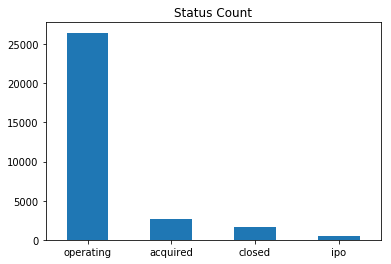

In [152]:
counts=recent_df.status.value_counts()
counts.plot(kind='bar', title='Status Count', rot=0);

In [96]:
df2=df.groupby(by='object_id').last()

## Review category and region values

In [97]:
df2=df2[['id', 'name','founded_at', 'region', 'category_code', 'status']]

In [98]:
df3=df2[~(df2['status']=='operating')]

In [102]:
df3.count()

id               3249
name             3249
founded_at       3249
region           3249
category_code    3188
status           3249
dtype: int64

In [111]:
df3['category_code'].value_counts().head(10).index

Index(['software', 'web', 'mobile', 'biotech', 'games_video', 'enterprise',
       'advertising', 'ecommerce', 'network_hosting', 'hardware'],
      dtype='object')

In [112]:
df3['region'].value_counts().head(6).index

Index(['SF Bay', 'New York', 'unknown', 'Boston', 'Los Angeles', 'Seattle'], dtype='object')

In [88]:
cat_stat=df2.groupby('category_code')['status'].value_counts()

In [89]:
cat_stat

category_code     status  
advertising       acquired     96
                  closed       55
                  ipo          12
analytics         acquired     27
                  closed        6
                  ipo           1
automotive        closed        3
                  acquired      2
                  ipo           1
biotech           acquired     96
                  ipo          61
                  closed       55
cleantech         closed       34
                  acquired     31
                  ipo          15
consulting        closed       17
                  acquired     10
                  ipo           4
design            acquired      1
                  closed        1
ecommerce         closed       85
                  acquired     50
                  ipo           9
education         acquired      9
                  closed        6
                  ipo           2
enterprise        acquired    131
                  closed       36
                  ipo

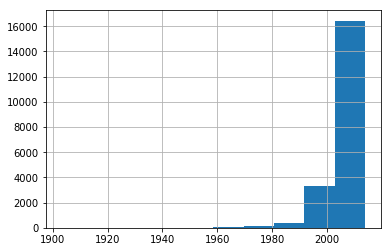

In [118]:
df2['founded_at'].hist()

In [128]:
df2['founded_at'].quantile(0.025)

Timestamp('1990-01-01 00:00:00')

# Explore modeling processed data

In [131]:
df2=pd.read_pickle('../data/processed/data_for_modeling.pkl')

In [133]:
df2.columns

Index(['category_code', 'days_active', 'participants', 'raised_sum', 'region',
       'round_rank', 'yearly_status'],
      dtype='object')

In [137]:
# get non-operating status data
df3=df2[~(df2['yearly_status']=='operating')]

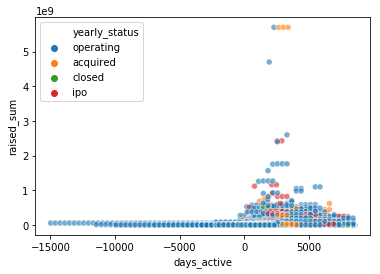

In [136]:
ax = sns.scatterplot(x="days_active", y="raised_sum", data=df2, hue="yearly_status", alpha=0.6)

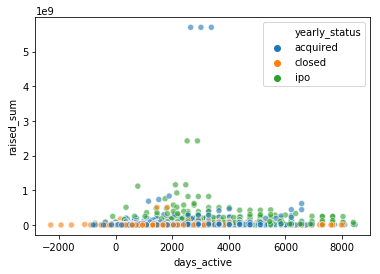

In [138]:
ax = sns.scatterplot(x="days_active", y="raised_sum", data=df3, hue="yearly_status", alpha=0.6)

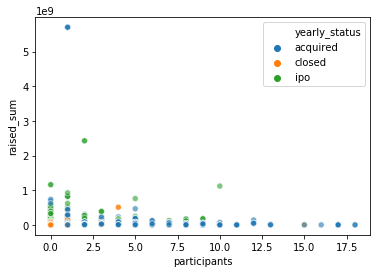

In [139]:
ax = sns.scatterplot(x="participants", y="raised_sum", data=df3, hue="yearly_status", alpha=0.6)

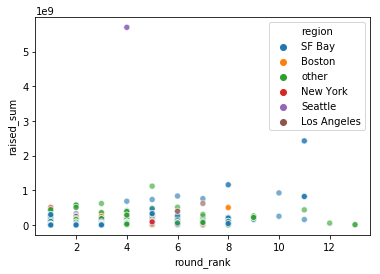

In [143]:
ax = sns.scatterplot(x="round_rank", y="raised_sum", data=df3, hue="region", alpha=0.6)

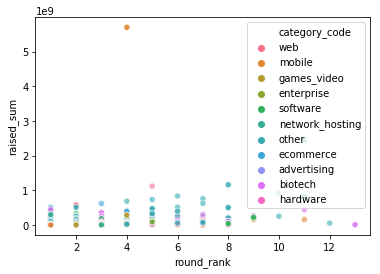

In [144]:
ax = sns.scatterplot(x="round_rank", y="raised_sum", data=df3, hue="category_code", alpha=0.6)

In [145]:
df2[df2['raised_sum']>3000000000]

,category_code,days_active,participants,raised_sum,region,round_rank,yearly_status
3574,mobile,1918.0,6.0,4.700000e+09,Seattle,2.0,operating
3575,mobile,2283.0,1.0,5.700000e+09,Seattle,4.0,operating
3576,mobile,2648.0,1.0,5.700000e+09,Seattle,4.0,acquired
3577,mobile,3013.0,1.0,5.700000e+09,Seattle,4.0,acquired
3578,mobile,3379.0,1.0,5.700000e+09,Seattle,4.0,acquired


In [146]:
df4=df2[df2['raised_sum']<3000000000]

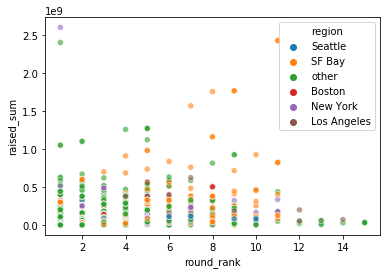

In [148]:
ax = sns.scatterplot(x="round_rank", y="raised_sum", data=df4, hue="region", alpha=0.6)